In [ ]:
#Nama : Julio Andarestu
#Instansi : Universitas Sriwijaya

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.utils import resample

In [42]:
df = pd.read_csv("heart.csv")

In [43]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [44]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [46]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [47]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

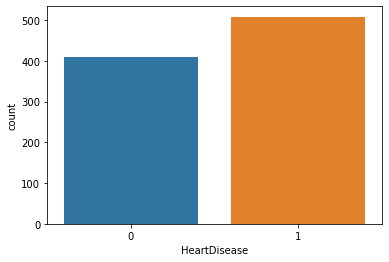

In [48]:
sns.countplot(data = df, x='HeartDisease')

In [49]:
df_majority = df[(df['HeartDisease']== 1)] 
df_minority = df[(df['HeartDisease']== 0)] 

df_minority_upsampled = resample(df_minority,
                          replace=True,      
                          n_samples=508,     
                          random_state=27)   

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [50]:
df_upsampled['HeartDisease'].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

<AxesSubplot:title={'center':'SalePrice Correlation with 3 Features'}>

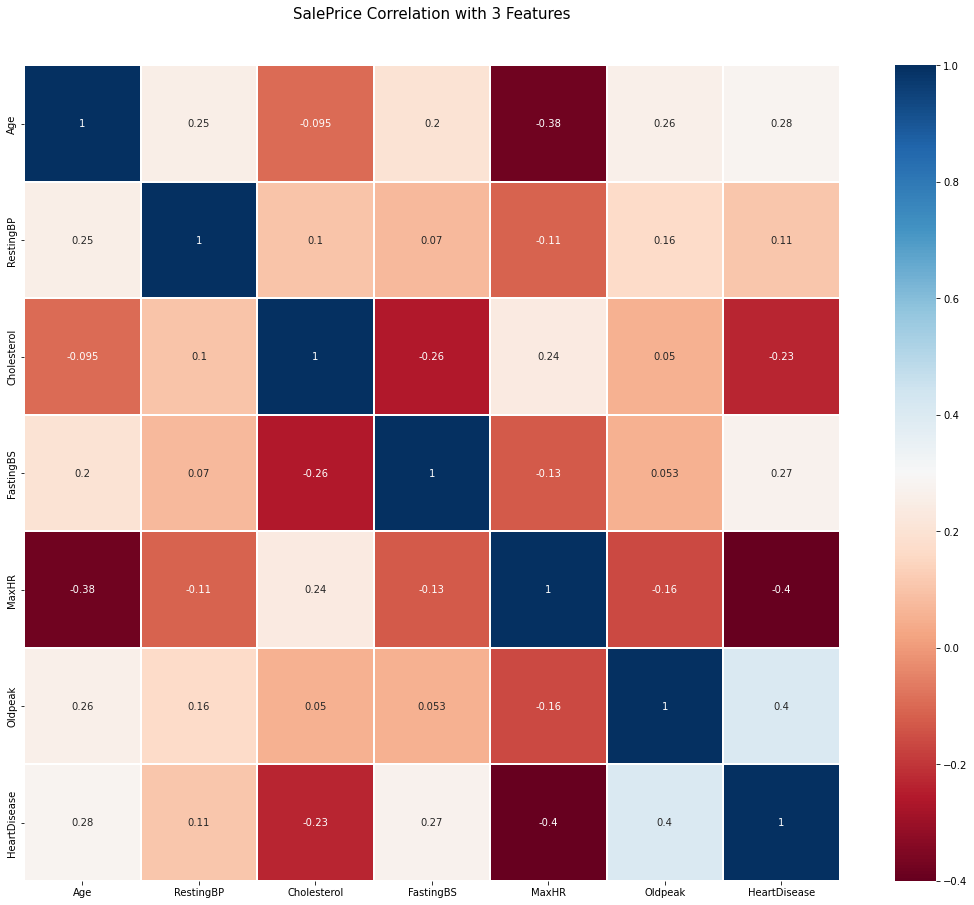

In [51]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,15))
plt.title('SalePrice Correlation with 3 Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [24]:
df_upsampled['HeartDisease'].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [67]:
df = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'RestingECG',
         'Oldpeak', 'ST_Slope', 'HeartDisease']]

KeyError: "['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'] not in index"

In [68]:
df = pd.get_dummies(df)
df.head()

,Age,RestingBP,FastingBS,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,0.0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,160,0,1.0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,138,0,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0
4,54,150,0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [69]:
df.to_csv('heart_data_encoding.csv.gz', index = False)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   FastingBS          918 non-null    int64  
 3   Oldpeak            918 non-null    float64
 4   HeartDisease       918 non-null    int64  
 5   Sex_F              918 non-null    uint8  
 6   Sex_M              918 non-null    uint8  
 7   ChestPainType_ASY  918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_LVH     918 non-null    uint8  
 12  RestingECG_Normal  918 non-null    uint8  
 13  RestingECG_ST      918 non-null    uint8  
 14  ST_Slope_Down      918 non-null    uint8  
 15  ST_Slope_Flat      918 non-null    uint8  
 16  ST_Slope_Up        918 non

In [70]:
X = df.loc[:, df.columns != 'HeartDisease']
y = df['HeartDisease']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=50)

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=50, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=50)

In [61]:
rf = RandomForestClassifier(random_state=50, n_jobs=-1)

In [62]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [63]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [64]:
grid_search.best_score_

0.8567344961240309

In [66]:
f_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

NameError: name 'rf_best' is not defined

In [ ]:
import joblib
joblib.dump(lr, 'model_logisticregression.pkl')
joblib.dump(classifier_rf, 'model_classifier_rf.pkl')
joblib.dump(rf_best, 'model_classifier_rf_hypertuned.pkl')

In [ ]:
y_lr = lr.predict(X_test)

y_rf_before = classifier_rf.predict(X_test)

y_rf_after = rf_best.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression : \n", confusion_matrix(y_test, y_lr))
print("Random Forest Awal : \n", confusion_matrix(y_test, y_rf_before))
print("Random Forest dengan Hyperparameter Tuning: \n", confusion_matrix(y_test, y_rf_after))

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regression : \n\n", classification_report(y_test, y_lr))
print("Random Forest Awal : \n\n", classification_report(y_test, y_rf_before))
print("Random Forest dengan Hyperparameter Tuning: \n\n", classification_report(y_test, y_rf_after))

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print("Logistic Regression :", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_before, pos_label=1) # pos_label: positive label
print("Random Forest Awal :", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_after, pos_label=1) # pos_label: positive label
print("Random Forest dengan Hyperparameter Tuning:", auc(fpr, tpr))